# Exercise 2: Maximum Profit 

CSCI208: Analysis and Design of Algorithms<br>
Fall 2021<br>
Nile University<br>
Contacts: Ammar Sherif (email-ID: ASherif)<br>
Module 04: Divide and Conquer

## Problem Statement

During tough times like these, investment becomes more uncertain with more dangers. To solve it, we might try to train a model to decide when to buy or sell. Therefore, to provide it with correct data, we plan to design an algorithm that answers:
- what is the perfect moment to buy and when to sell to maximize your profit?<br>
Assume you must buy

**Input**: 
$$\texttt{changes}:\ \text{array listing }\textbf{changes in the prices}\text{, where indices represent days; it has at least two values}$$
**Output**:
\begin{align*}
    i&: \text{index of the change before which we buy}\\
    j&: \text{index of the change before which we sell}\\
    \texttt{maxProfit}&: \text{the profit of this interval}\\
\end{align*}
**Example**:<br>
Assume the below table contains the prices of a particular stock over days
<table>
    <tr>
        <th colspan="2"><center>$\texttt{prices}$</center></th>
        <th colspan="1"><center>$\texttt{changes}$</center></th>
    </tr>
    <tr>
        <th>Day</th>
        <th>Value</th>
        <th></th>
    </tr>
    <tr>
        <td>0</td>
        <td>50</td>
        <td>-</td>
    </tr>
    <tr>
        <td>1</td>
        <td>63</td>
        <td>13</td>
    </tr>
    <tr>
        <td>2</td>
        <td>70</td>
        <td>7</td>
    </tr>
    <tr>
        <td>3</td>
        <td>40</td>
        <td>-30</td>
    </tr>
    <tr>
        <td>4</td>
        <td>55</td>
        <td>15</td>
    </tr>
    <tr>
        <td>5</td>
        <td>65</td>
        <td>10</td>
    </tr>
    <tr>
        <td>6</td>
        <td>60</td>
        <td>-5</td>
    </tr>
    <tr>
        <td>7</td>
        <td>72</td>
        <td>12</td>
    </tr>
    <tr>
        <td>8</td>
        <td>79</td>
        <td>7</td>
    </tr>
    <tr>
        <td>9</td>
        <td>68</td>
        <td>-11</td>
    </tr>
    <tr>
        <td>10</td>
        <td>74</td>
        <td>6</td>
    </tr>
</table>

Therefore, the output of `maxProfit([13,7,-30,15,10,-5,12,7,-11,6])` should be `(3, 7, 39)` . This is because our **maximum profit** would be $\boxed{39}$ when we buy the stock at day 4, **index** of $\boxed{3}$, and sell after day 8, index of $\boxed{7}$. Then, the total profit is $15+10-5+12+7 = 39$

We will try to solve the problem using various techniques:
- Brute-Force
- Divide-and-Conquer

### Simple Iterative
As we in general, try to solve the problem first; we start with a **brute force**, simple, algorithm: design it below

In [20]:
maxv = 0
if maxv < -1000:
    print(-1000)

In [244]:
# write your implementation here
def maxProfitBrute(changes):
    """
    it returns the indices of (i,j) indicating the day to buy and sell respectively 
    to have the maximum profit in a list of prices per day in <changes>. 
    
    Inputs:
    - changes: the list holding the changes in prices; the value whose index is k represents
               the change between day <k> and day <k+1>
               <changes> has at least a single change [two days]
    
    Output:
    - i: the index of the change before which we buy
    - j: the index of the change after which we sell
    - maxProfit: the value of the maximum profit
    
    Example:
    changes = [1,2]
    
    - that means the price started with <x>;
    - day 1: it became <x+1>
    - day 2: it became <x+3>
    In that case: (i,j) = (0,1) as we should buy at the first day, and sell after the third day
    """
    indices = (0, len(changes)-1)
    sumval = sum(changes)
    for i in range(len(changes)):
        for j in range(1, len(changes)):
            if sum(changes[i:j]) > sumval:
                sumval = sum(changes[i:j])
                indices = (i,j-1)
    return (sumval, indices)

In [245]:
# Try your algorithm
maxProfitBrute([13,7,-30,15,10,-5,12,7,-11,6])

(39, (3, 7))

### Divide and Conquer
Now, we would try to use a divide and conquer paradigm. **Hint**: try the three steps, and design multiple versions to master these steps

In [287]:
def MaxProfit(arr, changes, n):
    if n == 1:
        return changes[0], arr.index(changes[0]), arr.index(changes[0])
    mid = n // 2
    leftMaxSub, x, y = MaxProfit(arr,changes, mid)
    rightMAxSub, z, w = MaxProfit(arr,changes[mid:], n-mid)
    leftsum = [-100000000, 0, 0]
    rightsum = [-100000000, 0, 0]
    sumArr = 0
    for i in range(mid, n):
        sumArr += changes[i]
        if sumArr > rightsum[0]:
            rightsum = [sumArr, arr.index(changes[mid]), arr.index(changes[i])]
    sumArr = 0
    j = mid-1
    while j >= 0:
        sumArr += changes[j]
        if sumArr > leftsum[0]:
            leftsum = [sumArr, arr.index(changes[j]), arr.index(changes[mid])]
        j-=1
    if leftMaxSub > rightMAxSub:
        output = [leftMaxSub, x, y]
    else:
        output = [rightMAxSub, z, w]
    #output = max(leftMaxSubArr, rightMAxSubArr)
    ret = [leftsum[0] + rightsum[0], leftsum[1], rightsum[2]]
    if output[0] > ret[0]:
        return output[0], output[1], output[2]
    else:
        return ret[0], ret[1], ret[2]
    #return max(output, leftsum + rightsum)

In [288]:
x = MaxProfit([110, 202, 256, -660, -209, 661, -55, -960, -306, -498], [110, 202, 256, -660, -209, 661, -55, -960, -306, -498], len([110, 202, 256, -660, -209, 661, -55, -960, -306, -498]))
print(x)

(661, 5, 5)


In [289]:
x = maxProfitBrute([110, 202, 256, -660, -209, 661, -55, -960, -306, -498])
print(x)

(661, (5, 5))


## Empirical Analysis
Now, compare between the growth rate of the two algorithms

In [290]:
# feel free to import what you want
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import time

In [295]:
import random
lst = []
start = -1000
end = 1000
for i in range(10, 60):
    rlist = random.sample(range(start, end), i)
    lst.append(rlist)
len(lst)

50

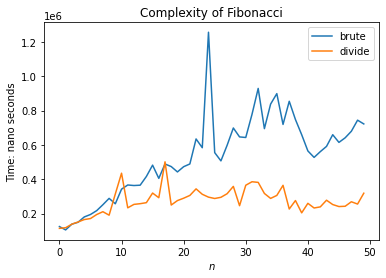

In [297]:
times1 = []
times2 = []
for n in range(0, 50):
    start_time = time.time()
    x = maxProfitBrute(lst[n])
    execution_time_ns = (time.time() - start_time)*(10**9)
    times1.append(execution_time_ns)
    
    start_time = time.time()
    y, z, w = MaxProfit(lst[n], lst[n], len(lst[n]))
    execution_time_ns = (time.time() - start_time)*(10**9)
    times2.append(execution_time_ns)
f,ax = plt.subplots()
ax.plot(range(50),times1,label='brute')
ax.plot(range(50),times2,label='divide')
ax.set_xlabel('$n$')
ax.set_ylabel('Time: nano seconds')
ax.set_title('Complexity of Fibonacci')
ax.legend(loc=0);

## Theoretical Analysis

### Brute Force

T(N) = n * n + c
O(n) = n^2

### Divide and Conquer

T(n) = 2T(n/2)
T(n-1) = 2(2T((n-1)/2^t))
T(n) = O(nlog(n))